In [2]:
import pandas as pd

df = pd.read_csv('../data/diabetic_data.csv')

df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


## Exploratory Data Analysis

In [4]:
print('Number of Rows = ' + str(df.shape[0]))
print('Number of Columns = ' + str(df.shape[1]))

Number of Rows = 101766
Number of Columns = 50


In [5]:
print(df.dtypes)

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
print(df.time_in_hospital.describe())

count    101766.000000
mean          4.395987
std           2.985108
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max          14.000000
Name: time_in_hospital, dtype: float64


In [7]:
df.nunique()

encounter_id                101766
patient_nbr                  71518
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
diag_1                         717
diag_2                         749
diag_3                         790
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride         

In [8]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

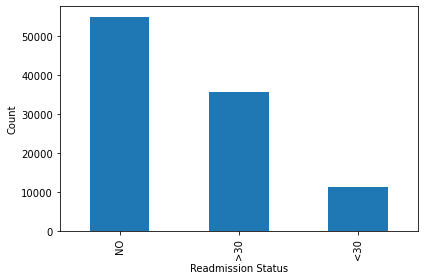

In [26]:
import matplotlib
from matplotlib import pylab as plt

pd.value_counts(df['readmitted']).plot.bar()
plt.ylabel('Count')
plt.xlabel('Readmission Status')
plt.tight_layout()
plt.savefig('../figures/readmission_barplot.pdf')

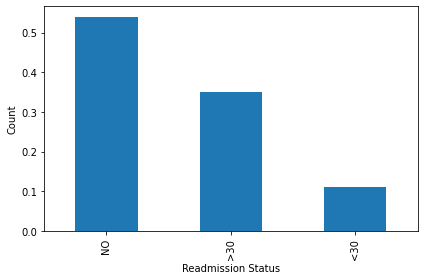

In [34]:
pd.value_counts(df['readmitted'],normalize=True).plot.bar()
plt.ylabel('Count')
plt.xlabel('Readmission Status')
plt.tight_layout()
plt.savefig('../figures/readmission_barplot_norm.pdf')

In [12]:
df['discharge_disposition_id'].value_counts()

1     60234
3     13954
6     12902
18     3691
2      2128
22     1993
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64

In [88]:
count_matrix = df.groupby(['weight', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

print(count_matrix_norm)

readmitted       <30       >30        NO
weight                                  
>200             NaN  1.000000       NaN
[0-25)      0.166667  0.645833  0.187500
[100-125)   0.107200  0.467200  0.425600
[125-150)   0.082759  0.475862  0.441379
[150-175)   0.085714  0.457143  0.457143
[175-200)   0.090909  0.454545  0.454545
[25-50)     0.082474  0.432990  0.484536
[50-75)     0.117057  0.433668  0.449275
[75-100)    0.114521  0.496257  0.389222


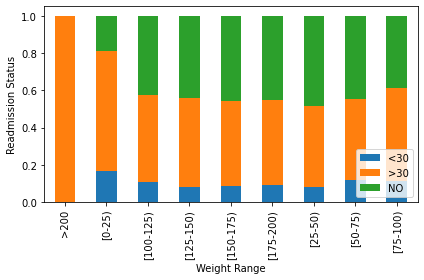

In [89]:
count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Weight Range')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_weight_stacked.pdf')

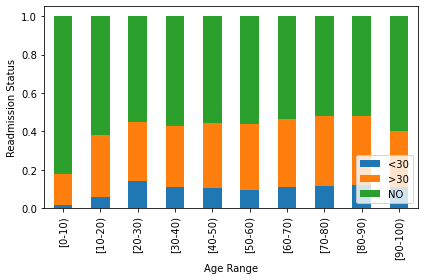

In [87]:
count_matrix = df.groupby(['age', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Age Range')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_age_stacked.pdf')

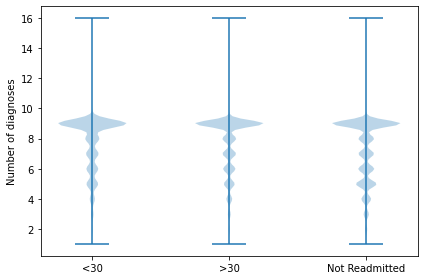

In [53]:
dataset = [df[df['readmitted']=='<30']['number_diagnoses'].values,
           df[df['readmitted']=='>30']['number_diagnoses'].values,
           df[df['readmitted']=='NO']['number_diagnoses'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of diagnoses')
plt.tight_layout()
plt.savefig('../figures/readmitted_diagnoses_violin.pdf')

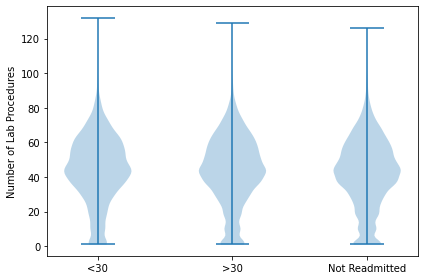

In [65]:
dataset = [df[df['readmitted']=='<30']['num_lab_procedures'].values,
           df[df['readmitted']=='>30']['num_lab_procedures'].values,
           df[df['readmitted']=='NO']['num_lab_procedures'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Lab Procedures')
plt.tight_layout()
plt.savefig('../figures/readmitted_labprocedures_violin.pdf')

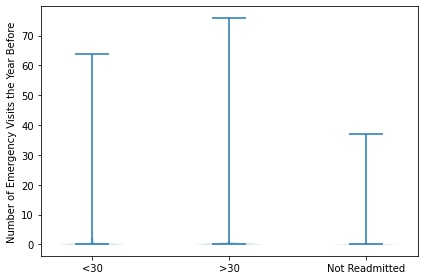

In [52]:
dataset = [df[df['readmitted']=='<30']['number_emergency'].values,
           df[df['readmitted']=='>30']['number_emergency'].values,
           df[df['readmitted']=='NO']['number_emergency'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Emergency Visits the Year Before')
plt.tight_layout()
plt.savefig('../figures/readmitted_emergency_violin.pdf')

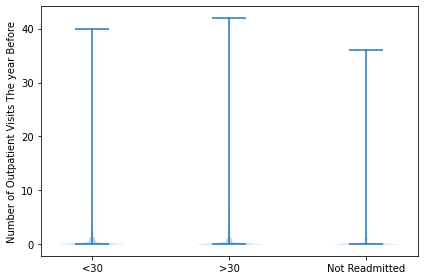

In [51]:
dataset = [df[df['readmitted']=='<30']['number_outpatient'].values,
           df[df['readmitted']=='>30']['number_outpatient'].values,
           df[df['readmitted']=='NO']['number_outpatient'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Outpatient Visits The year Before')
plt.tight_layout()
plt.savefig('../figures/readmitted_outpatient_violin.pdf')

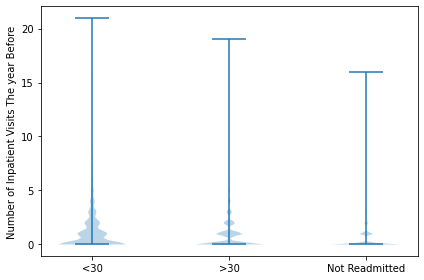

In [50]:
dataset = [df[df['readmitted']=='<30']['number_inpatient'].values,
           df[df['readmitted']=='>30']['number_inpatient'].values,
           df[df['readmitted']=='NO']['number_inpatient'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Inpatient Visits The year Before')
plt.tight_layout()
plt.savefig('../figures/readmitted_inpatient_violin.pdf')

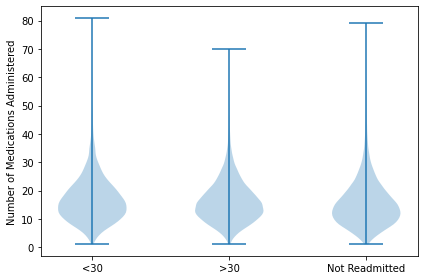

In [49]:
dataset = [df[df['readmitted']=='<30']['num_medications'].values,
           df[df['readmitted']=='>30']['num_medications'].values,
           df[df['readmitted']=='NO']['num_medications'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Medications Administered')
plt.tight_layout()
plt.savefig('../figures/readmitted_medications_violin.pdf')

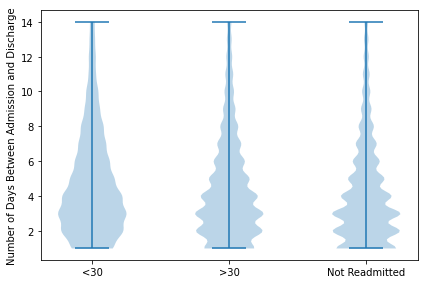

In [58]:
dataset = [df[df['readmitted']=='<30']['time_in_hospital'].values,
           df[df['readmitted']=='>30']['time_in_hospital'].values,
           df[df['readmitted']=='NO']['time_in_hospital'].values]

plt.violinplot(dataset = dataset)
plt.xticks([1,2,3],['<30','>30','Not Readmitted'])
plt.ylabel('Number of Days Between Admission and Discharge')
plt.tight_layout()
plt.savefig('../figures/readmitted_timeinhospital_violin.pdf')

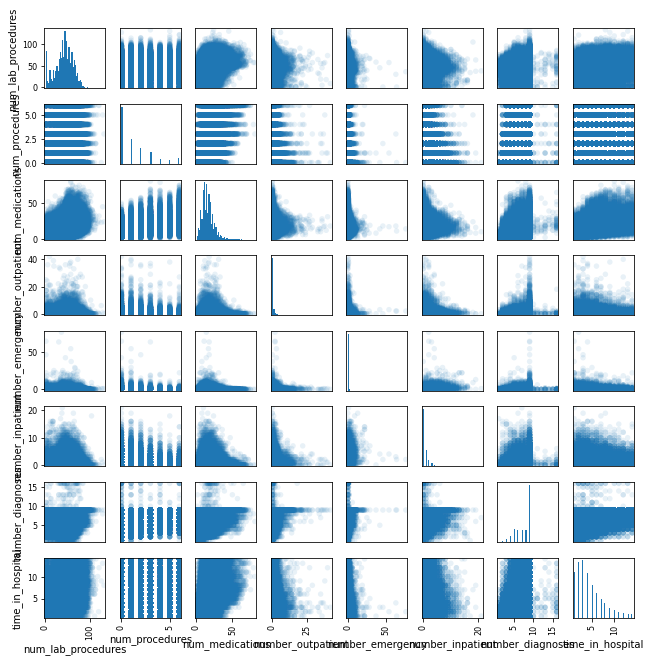

In [61]:
numcols =['num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses','time_in_hospital']
pd.plotting.scatter_matrix(df[numcols], figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1)
plt.tight_layout()
plt.savefig('../figures/numericaldata_scattermatrix.jpg')

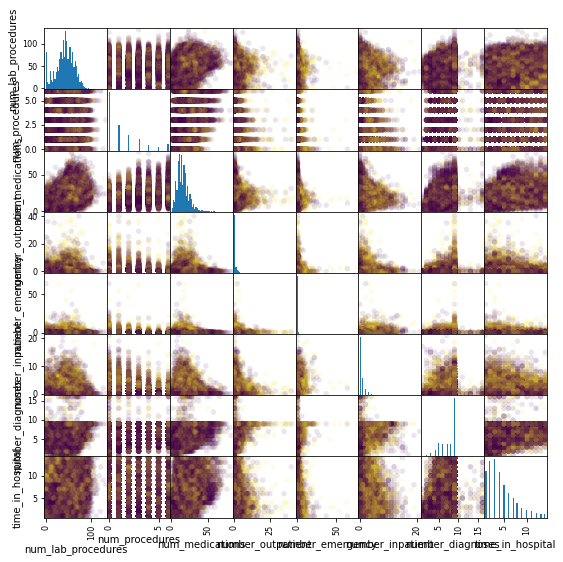

In [119]:
pd.plotting.scatter_matrix(df[numcols], figsize=(9, 9),c = pd.get_dummies(df['readmitted']).iloc[:,1], 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.tight_layout
plt.savefig('../figures/numericaldata_readmitted_scattermatrix.jpg')

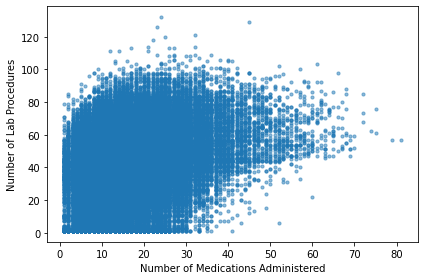

In [66]:
df.plot.scatter('num_medications','num_lab_procedures',alpha=0.5,s=10)
plt.ylabel('Number of Lab Procedures')
plt.xlabel('Number of Medications Administered')
plt.tight_layout()
plt.savefig('../figures/medications_labprocedures_scatter.pdf')

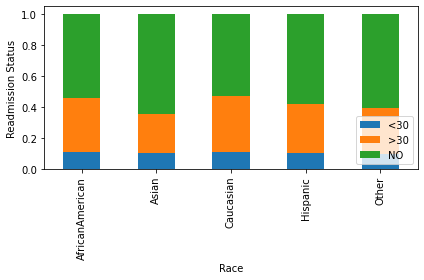

In [73]:
count_matrix = df.groupby(['race', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Race')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_race_stacked.pdf')

In [78]:
df['race'].value_counts()

Caucasian          76099
AfricanAmerican    19210
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

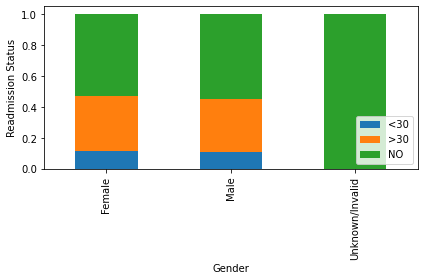

In [77]:
count_matrix = df.groupby(['gender', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Gender')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_gender_stacked.pdf')

In [76]:
df['gender'].value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

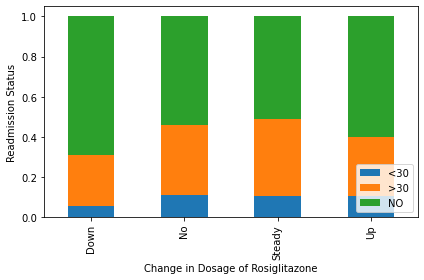

In [93]:
count_matrix = df.groupby(['rosiglitazone', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Change in Dosage of Rosiglitazone')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_rosiglitazone_stacked.pdf')

In [85]:
df['rosiglitazone'].value_counts()

No        95401
Steady     6100
Up          178
Down         87
Name: rosiglitazone, dtype: int64

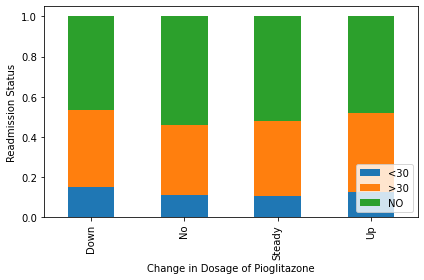

In [92]:
count_matrix = df.groupby(['pioglitazone', 'readmitted']).size().unstack()

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)

count_matrix_norm.plot(kind='bar', stacked=True)
plt.ylabel('Readmission Status')
plt.xlabel('Change in Dosage of Pioglitazone')
plt.legend(loc=4)
plt.tight_layout()
plt.savefig('../figures/readmitted_pioglitazone_stacked.pdf')

In [14]:
df['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

## Preprocessing

In [4]:
import numpy as np
df.replace("?",np.nan,inplace=True)

In [5]:
numcols = ['num_lab_procedures','num_procedures','num_medications','number_outpatient',
           'number_emergency','number_inpatient','number_diagnoses','time_in_hospital']
catcols = ['race','gender','age','weight','admission_type_id','discharge_disposition_id',
           'admission_source_id','payer_code','medical_specialty','diag_1','diag_2','diag_3',
           'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide',
           'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
           'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
           'tolazamide','insulin','glyburide-metformin',
           'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
           'metformin-pioglitazone','change','diabetesMed']
print(len(numcols))
print(len(catcols))

8
37


In [6]:
df[numcols].isnull().sum()

num_lab_procedures    0
num_procedures        0
num_medications       0
number_outpatient     0
number_emergency      0
number_inpatient      0
number_diagnoses      0
time_in_hospital      0
dtype: int64

In [7]:
df[catcols].isnull().sum()

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
payer_code                  40256
medical_specialty           49949
diag_1                         21
diag_2                        358
diag_3                       1423
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose                        0
miglitol                        0
troglitazone                    0
tolazamide                      0
insulin       

In [8]:
df['race'] = df['race'].fillna('Unknown')
df['weight'] = df['weight'].fillna('Unknown')
df['payer_code'] = df['payer_code'].fillna('Unknown')
df['medical_specialty'] = df['medical_specialty'].fillna('Unknown')
df['diag_1'] = df['diag_1'].fillna('Unknown')
df['diag_2'] = df['diag_2'].fillna('Unknown')
df['diag_3'] = df['diag_2'].fillna('Unknown')

In [9]:
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [10]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


ordinal_ftrs=['age']
ordinal_cats=[['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
               '[60-70)', '[70-80)', '[80-90)', '[90-100)']]
onehot_ftrs= ['race','gender','weight','admission_type_id','discharge_disposition_id',
           'admission_source_id','payer_code','medical_specialty',
           'max_glu_serum','A1Cresult','metformin','repaglinide','nateglinide',
           'chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide',
           'tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone',
           'tolazamide','insulin','glyburide-metformin',
           'glipizide-metformin','glimepiride-pioglitazone','metformin-rosiglitazone',
           'metformin-pioglitazone','change','diabetesMed']
std_ftrs=['num_lab_procedures','num_procedures','num_medications','number_outpatient',
           'number_emergency','number_inpatient','number_diagnoses','time_in_hospital']


X = df[ordinal_ftrs+onehot_ftrs+std_ftrs]
y = df['readmitted']
group_on = df['patient_nbr']

preprocessor = ColumnTransformer(
    transformers=[
    ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
    ('onehot', OneHotEncoder(sparse=True,handle_unknown='ignore'), onehot_ftrs),
    ('std', StandardScaler(), std_ftrs)])


In [46]:
#Baseline accuracy score- predict most populous class for all

baseline_accuracy = len(df[df["readmitted"]=="NO"])/len(df["readmitted"])
baseline_accuracy

0.5391191557101586

In [172]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GroupKFold
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

def MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid, nr_states = 5):
    
    '''
    This function splits the data to other/test (80/20) using GroupShuffleSplit and then applies GroupKFold with 4 folds to other.
    The RMSE is minimized in cross-validation.'''
    
    test_scores = np.zeros(nr_states)
    final_models = []
    group_on = df['patient_nbr']

    for i in range(nr_states):
        
        gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=47*i)
        
        for other_idx, test_idx in gss.split(X, y, group_on):
            X_other = X.iloc[other_idx]
            y_other = y.iloc[other_idx]
            X_test = X.iloc[test_idx]
            y_test = y.iloc[test_idx]
            group_on_other = group_on.iloc[other_idx] 
            group_on_test = group_on.iloc[test_idx]
            
        gkfold = GroupKFold(n_splits=4)
        
        pipeline = make_pipeline(preprocessor, ML_algo)
        
        grid = GridSearchCV(pipeline, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                            cv=gkfold, return_train_score = True, n_jobs=-1, verbose=3)

        grid.fit(X_other, y_other, groups=group_on_other)
             
        results = pd.DataFrame(grid.cv_results_)
        
        print("")
        print('Best Model Parameters:', grid.best_params_)
        print('Best Validation Score:', grid.best_score_) 

        final_models.append(grid)
        
        y_test_pred = final_models[-1].predict(X_test)
        
        test_scores[i] = accuracy_score(y_test, y_test_pred)        
        print('Test Score:',test_scores[i])
        print("")
        
    return final_models, test_scores



### LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression

ML_algo = LogisticRegression(random_state=47, solver='saga', penalty='none',max_iter=10000)
param_grid = {}

result_lognone = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 3/4] END ..............., score=(train=0.585, test=0.586) total time= 4.2min
[CV 2/4] END ..............., score=(train=0.586, test=0.583) total time= 4.6min
[CV 1/4] END ..............., score=(train=0.586, test=0.581) total time= 4.6min
[CV 4/4] END ..............., score=(train=0.587, test=0.580) total time= 4.7min

Best Model Parameters: {}
Best Validation Score: 0.5826056027081391
Test Score: 0.5838687357912424

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 3/4] END ..............., score=(train=0.585, test=0.582) total time= 4.1min
[CV 4/4] END ..............., score=(train=0.586, test=0.580) total time= 4.7min
[CV 1/4] END ..............., score=(train=0.585, test=0.586) total time= 4.7min
[CV 2/4] END ..............., score=(train=0.585, test=0.582) total time= 4.8min

Best Model Parameters: {}
Best Validation Score: 0.5825373669859155
Test Score: 0.5858927259368112

Fitting 4 folds for each of 1 ca

In [33]:
print('Mean Test Score:', np.mean(result_lognone[1]))
print('Standard Deviation of Test Score:', np.std(result_lognone[1]))

Mean Test Score: 0.5848802408249523
Standard Deviation of Test Score: 0.002938389399951688


In [227]:
grid = result_lognone[0]

file = open('../results/lognone_grid.save', 'wb')
pickle.dump(grid,file)
file.close()

results = result_lognone[1]

file = open('../results/lognone_result.save', 'wb')
pickle.dump(results,file)
file.close()

In [31]:
ML_algo = LogisticRegression(random_state=47,penalty='l1', solver='saga', max_iter=10000)
param_grid = {
 'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

result_logl1 = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV 3/4] END logisticregression__C=0.001;, score=(train=0.564, test=0.568) total time= 1.0min
[CV 2/4] END logisticregression__C=0.001;, score=(train=0.564, test=0.566) total time= 1.8min
[CV 1/4] END logisticregression__C=0.01;, score=(train=0.581, test=0.576) total time=  45.8s
[CV 1/4] END logisticregression__C=0.001;, score=(train=0.566, test=0.563) total time= 1.9min
[CV 4/4] END logisticregression__C=0.001;, score=(train=0.565, test=0.563) total time= 2.0min
[CV 2/4] END logisticregression__C=0.01;, score=(train=0.580, test=0.577) total time=  50.5s
[CV 4/4] END logisticregression__C=0.01;, score=(train=0.579, test=0.579) total time=  49.8s
[CV 3/4] END logisticregression__C=0.01;, score=(train=0.578, test=0.584) total time= 1.6min
[CV 3/4] END logisticregression__C=0.1;, score=(train=0.583, test=0.587) total time= 3.9min
[CV 1/4] END logisticregression__C=0.1;, score=(train=0.585, test=0.581) total time= 7.0min
[CV 2/4]

[CV 2/4] END logisticregression__C=0.001;, score=(train=0.562, test=0.563) total time=  31.6s
[CV 3/4] END logisticregression__C=0.001;, score=(train=0.563, test=0.560) total time=  33.3s
[CV 1/4] END logisticregression__C=0.001;, score=(train=0.564, test=0.559) total time=  40.8s
[CV 1/4] END logisticregression__C=0.01;, score=(train=0.579, test=0.572) total time= 1.6min
[CV 2/4] END logisticregression__C=0.01;, score=(train=0.578, test=0.578) total time= 1.7min
[CV 3/4] END logisticregression__C=0.01;, score=(train=0.578, test=0.575) total time= 1.8min
[CV 4/4] END logisticregression__C=0.01;, score=(train=0.576, test=0.585) total time= 2.5min
[CV 1/4] END logisticregression__C=0.1;, score=(train=0.583, test=0.580) total time= 2.1min
[CV 3/4] END logisticregression__C=0.1;, score=(train=0.583, test=0.580) total time= 2.1min
[CV 2/4] END logisticregression__C=0.1;, score=(train=0.583, test=0.580) total time= 2.3min
[CV 4/4] END logisticregression__C=0.1;, score=(train=0.581, test=0.58

In [34]:
print('Mean Test Score:', np.mean(result_logl1[1]))
print('Standard Deviation of Test Score:', np.std(result_logl1[1]))

Mean Test Score: 0.5849992192031344
Standard Deviation of Test Score: 0.0030831131362543886


In [226]:
grid = result_logl1[0]

file = open('../results/logl1_grid.save', 'wb')
pickle.dump(grid,file)
file.close()

results = result_logl1[1]

file = open('../results/logl1_result.save', 'wb')
pickle.dump(results,file)
file.close()

In [32]:
ML_algo = LogisticRegression(random_state = 47, penalty='l2', solver='saga', max_iter=10000)
param_grid = {
 'logisticregression__C': [0.001, 0.01, 0.1, 1,10]}

result_logl2 = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid)

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV 3/4] END logisticregression__C=0.001;, score=(train=0.578, test=0.582) total time=   5.4s
[CV 1/4] END logisticregression__C=0.001;, score=(train=0.580, test=0.574) total time=   9.0s
[CV 2/4] END logisticregression__C=0.001;, score=(train=0.579, test=0.578) total time=   7.3s
[CV 4/4] END logisticregression__C=0.001;, score=(train=0.579, test=0.577) total time=   7.3s
[CV 3/4] END logisticregression__C=0.01;, score=(train=0.583, test=0.587) total time=  10.5s
[CV 2/4] END logisticregression__C=0.01;, score=(train=0.585, test=0.582) total time=  17.2s
[CV 1/4] END logisticregression__C=0.01;, score=(train=0.584, test=0.582) total time=  18.0s
[CV 4/4] END logisticregression__C=0.01;, score=(train=0.585, test=0.581) total time=  15.7s
[CV 3/4] END logisticregression__C=0.1;, score=(train=0.584, test=0.586) total time=  46.4s
[CV 1/4] END logisticregression__C=0.1;, score=(train=0.585, test=0.582) total time= 1.2min
[CV 2/4]

[CV 2/4] END logisticregression__C=0.001;, score=(train=0.578, test=0.578) total time=   4.2s
[CV 4/4] END logisticregression__C=0.001;, score=(train=0.575, test=0.585) total time=   4.0s
[CV 3/4] END logisticregression__C=0.001;, score=(train=0.578, test=0.572) total time=   4.4s
[CV 1/4] END logisticregression__C=0.01;, score=(train=0.583, test=0.579) total time=   7.8s
[CV 3/4] END logisticregression__C=0.01;, score=(train=0.583, test=0.577) total time=   7.6s
[CV 4/4] END logisticregression__C=0.01;, score=(train=0.580, test=0.587) total time=   7.5s
[CV 2/4] END logisticregression__C=0.01;, score=(train=0.582, test=0.581) total time=   8.4s
[CV 4/4] END logisticregression__C=0.1;, score=(train=0.581, test=0.587) total time=  25.9s
[CV 3/4] END logisticregression__C=0.1;, score=(train=0.584, test=0.578) total time=  26.9s
[CV 1/4] END logisticregression__C=0.1;, score=(train=0.584, test=0.580) total time=  28.7s
[CV 2/4] END logisticregression__C=0.1;, score=(train=0.583, test=0.58

In [35]:
print('Mean Test Score:', np.mean(result_logl2[1]))
print('Standard Deviation of Test Score:', np.std(result_logl2[1]))

Mean Test Score: 0.58516780628014
Standard Deviation of Test Score: 0.003343065364278162


In [228]:
grid = result_logl2[0]

file = open('../results/logl2_grid.save', 'wb')
pickle.dump(grid,file)
file.close()

results = result_logl2[1]

file = open('../results/logl2_result.save', 'wb')
pickle.dump(results,file)
file.close()

In [36]:
ML_algo = LogisticRegression(random_state = 47, penalty='elasticnet', solver='saga', max_iter=10000)
param_grid = {
 'logisticregression__C': [0.01, 0.1, 1, 10],
 'logisticregression__l1_ratio': np.linspace(0.2,1,5).tolist()[:4]
}

result_log_elastic = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid)

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 3/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.582, test=0.584) total time=  21.1s
[CV 2/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.583, test=0.581) total time=  33.0s
[CV 1/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.584, test=0.580) total time=  33.5s
[CV 4/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.583, test=0.581) total time=  33.0s
[CV 3/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.4;, score=(train=0.581, test=0.584) total time=  31.2s
[CV 1/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.4;, score=(train=0.583, test=0.579) total time=  49.9s
[CV 4/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.4;, score=(train=0.582, test=0.582) total time=  46.1s
[CV 2/4] END logisticregression__C=0.01, logisticr

[CV 4/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.587, test=0.580) total time= 9.8min

Best Model Parameters: {'logisticregression__C': 1, 'logisticregression__l1_ratio': 0.6000000000000001}
Best Validation Score: 0.5828999656576559
Test Score: 0.5836710487298606

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 3/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.583, test=0.580) total time=  19.3s
[CV 1/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.581, test=0.584) total time=  34.2s
[CV 2/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.582, test=0.581) total time=  35.1s
[CV 4/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.583, test=0.581) total time=  35.7s
[CV 3/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.4;, score=(train=0.582, test=0.579) total time=  23.3s


[CV 1/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.585, test=0.586) total time=11.9min
[CV 2/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.585, test=0.582) total time=12.2min
[CV 4/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.586, test=0.580) total time= 8.8min

Best Model Parameters: {'logisticregression__C': 1, 'logisticregression__l1_ratio': 0.2}
Best Validation Score: 0.5825373706124861
Test Score: 0.5860396767083027

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 1/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.584, test=0.581) total time=  18.5s
[CV 2/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.584, test=0.583) total time=  33.7s
[CV 4/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.582, test=0.583) total time=  33.8s
[CV 3/4] END logist

[CV 3/4] END logisticregression__C=10, logisticregression__l1_ratio=0.6000000000000001;, score=(train=0.587, test=0.584) total time=13.0min
[CV 1/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.588, test=0.582) total time=11.4min
[CV 2/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.586, test=0.584) total time=11.2min
[CV 3/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.587, test=0.584) total time=11.0min
[CV 4/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.585, test=0.585) total time=10.7min

Best Model Parameters: {'logisticregression__C': 1, 'logisticregression__l1_ratio': 0.8}
Best Validation Score: 0.5841162870775739
Test Score: 0.5818092909535453

Fitting 4 folds for each of 16 candidates, totalling 64 fits
[CV 4/4] END logisticregression__C=0.01, logisticregression__l1_ratio=0.2;, score=(train=0.583, test=0.580) total time=  15.1s
[CV 3/4]

[CV 2/4] END logisticregression__C=10, logisticregression__l1_ratio=0.6000000000000001;, score=(train=0.586, test=0.582) total time=10.8min
[CV 4/4] END logisticregression__C=10, logisticregression__l1_ratio=0.6000000000000001;, score=(train=0.586, test=0.581) total time=11.9min
[CV 3/4] END logisticregression__C=10, logisticregression__l1_ratio=0.6000000000000001;, score=(train=0.586, test=0.586) total time=12.5min
[CV 1/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.586, test=0.582) total time=10.1min
[CV 2/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.586, test=0.583) total time=10.2min
[CV 4/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.586, test=0.581) total time= 8.8min
[CV 3/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.586, test=0.586) total time= 9.2min

Best Model Parameters: {'logisticregression__C': 0.1, 'logisticregression__l1_r

[CV 3/4] END logisticregression__C=10, logisticregression__l1_ratio=0.4;, score=(train=0.585, test=0.578) total time=12.5min
[CV 2/4] END logisticregression__C=10, logisticregression__l1_ratio=0.6000000000000001;, score=(train=0.584, test=0.581) total time= 9.7min
[CV 1/4] END logisticregression__C=10, logisticregression__l1_ratio=0.6000000000000001;, score=(train=0.584, test=0.580) total time=10.8min
[CV 4/4] END logisticregression__C=10, logisticregression__l1_ratio=0.6000000000000001;, score=(train=0.582, test=0.586) total time= 8.8min
[CV 3/4] END logisticregression__C=10, logisticregression__l1_ratio=0.6000000000000001;, score=(train=0.585, test=0.578) total time=12.1min
[CV 2/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.584, test=0.581) total time= 9.3min
[CV 1/4] END logisticregression__C=10, logisticregression__l1_ratio=0.8;, score=(train=0.584, test=0.580) total time=10.3min
[CV 4/4] END logisticregression__C=10, logisticregression__l1_rat

In [39]:
print('Mean Test Score:', np.mean(result_log_elastic[1]))
print('Standard Deviation of Test Score:', np.std(result_log_elastic[1]))

Mean Test Score: 0.5850980527641281
Standard Deviation of Test Score: 0.0031322561164506247


In [229]:
grid = result_log_elastic[0]

file = open('../results/logelastic_grid.save', 'wb')
pickle.dump(grid,file)
file.close()

results = result_log_elastic[1]

file = open('../results/logelastic_result.save', 'wb')
pickle.dump(results,file)
file.close()

### RandomForestClassifier

In [60]:
ML_algo = RandomForestClassifier(random_state = 47)
param_grid = {
 'randomforestclassifier__max_depth': [10,12,15],
 'randomforestclassifier__max_features': [0.1, 0.175, 0.25]}

result_rfc = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid)
print("")
print('Mean Test Score:', np.mean(result_rfc)[1])
print('Standard Deviation of Test Score:', np.std(result_rfc)[1])

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV 4/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.1;, score=(train=0.622, test=0.584) total time= 1.0min
[CV 1/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.1;, score=(train=0.621, test=0.584) total time= 1.0min
[CV 2/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.1;, score=(train=0.621, test=0.582) total time= 1.0min
[CV 3/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.1;, score=(train=0.620, test=0.585) total time= 1.1min
[CV 1/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.629, test=0.585) total time= 1.6min
[CV 2/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.629, test=0.585) total time= 1.6min
[CV 4/4] END randomforestclassifier__max_depth=12, randomforestcla

[CV 4/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.1;, score=(train=0.620, test=0.587) total time= 1.0min
[CV 2/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.1;, score=(train=0.621, test=0.585) total time= 1.0min
[CV 1/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.627, test=0.581) total time= 1.6min
[CV 2/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.628, test=0.587) total time= 1.6min
[CV 3/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.626, test=0.585) total time= 1.6min
[CV 4/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.628, test=0.587) total time= 1.6min
[CV 1/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.25;, score=(train=0.633, test=0.

[CV 1/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.629, test=0.583) total time= 1.7min
[CV 3/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.629, test=0.583) total time= 1.7min
[CV 2/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.627, test=0.588) total time= 1.7min
[CV 4/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.628, test=0.588) total time= 1.7min
[CV 1/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.25;, score=(train=0.634, test=0.584) total time= 2.2min
[CV 3/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.25;, score=(train=0.633, test=0.584) total time= 2.1min
[CV 2/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.25;, score=(train=0.634, test=

In [214]:
from sklearn.ensemble import RandomForestClassifier

ML_algo = RandomForestClassifier(random_state = 47)
param_grid = {
 'randomforestclassifier__max_depth': [12],
 'randomforestclassifier__max_features': [0.175]}

result_rfc = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid)
print("")
print('Mean Test Score:', np.mean(result_rfc[1]))
print('Standard Deviation of Test Score:', np.std(result_rfc[1]))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 3/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.628, test=0.584) total time= 1.5min
[CV 1/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.628, test=0.584) total time= 1.5min
[CV 4/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.630, test=0.587) total time= 1.5min
[CV 2/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.631, test=0.587) total time= 1.5min

Best Model Parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.175}
Best Validation Score: 0.5857209439238581
Test Score: 0.5876742117228427

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 2/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(trai

In [230]:
grid = result_rfc[0]

file = open('../results/randomforest_grid.save', 'wb')
pickle.dump(grid,file)
file.close()

results = result_rfc[1]

file = open('../results/randomforest_result.save', 'wb')
pickle.dump(results,file)
file.close()

In [176]:
result_rfc[0][0].best_estimator_[1]

RandomForestClassifier(max_depth=12, max_features=0.175, random_state=47)

In [110]:
test_list=[]
for i in range(5): 
    ML_algo = RandomForestClassifier(random_state = 47*i)

    param_grid = {
     'randomforestclassifier__max_depth': [12],
     'randomforestclassifier__max_features': [0.175]}

    result_ = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid, nr_states = 1)
    print("")
    print('Test Score:', result_[1])
    test_list.append(result_[1])
    
print("")
print('Mean Test Score:', np.mean(test_list))
print('Standard Deviation of Test Score:',np.std(test_list))

Fitting 4 folds for each of 1 candidates, totalling 4 fits

Best Model Parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.175}
Best Validation Score: 0.5857086788009617
Test Score: 0.589206286448552


Test Score: [0.58920629]
Fitting 4 folds for each of 1 candidates, totalling 4 fits

Best Model Parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.175}
Best Validation Score: 0.5857209439238581
Test Score: 0.5876742117228427


Test Score: [0.58767421]
Fitting 4 folds for each of 1 candidates, totalling 4 fits

Best Model Parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.175}
Best Validation Score: 0.5859171858902026
Test Score: 0.587278837600079


Test Score: [0.58727884]
Fitting 4 folds for each of 1 candidates, totalling 4 fits

Best Model Parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.175}
Best Validatio

### KNeighborsClassification

In [61]:
from sklearn.neighbors import KNeighborsClassifier

ML_algo = KNeighborsClassifier()

param_grid = {
 'kneighborsclassifier__n_neighbors': [10, 30, 100]}

result_kneighbors = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid)


Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV 1/4] END kneighborsclassifier__n_neighbors=10;, score=(train=0.635, test=0.535) total time=14.5min
[CV 2/4] END kneighborsclassifier__n_neighbors=10;, score=(train=0.632, test=0.547) total time=14.5min
[CV 3/4] END kneighborsclassifier__n_neighbors=10;, score=(train=0.632, test=0.544) total time=14.5min
[CV 4/4] END kneighborsclassifier__n_neighbors=10;, score=(train=0.635, test=0.531) total time=14.5min
[CV 1/4] END kneighborsclassifier__n_neighbors=30;, score=(train=0.602, test=0.560) total time=13.1min[CV 2/4] END kneighborsclassifier__n_neighbors=30;, score=(train=0.598, test=0.567) total time=13.1min

[CV 4/4] END kneighborsclassifier__n_neighbors=30;, score=(train=0.600, test=0.569) total time=13.1min
[CV 3/4] END kneighborsclassifier__n_neighbors=30;, score=(train=0.598, test=0.572) total time=13.1min
[CV 1/4] END kneighborsclassifier__n_neighbors=100;, score=(train=0.584, test=0.571) total time=10.2min
[CV 2/4] END

TypeError: unsupported operand type(s) for +: 'GridSearchCV' and 'GridSearchCV'

In [62]:
print('Mean Test Score:', np.mean(result_kneighbors[1]))
print('Standard Deviation of Test Score:', np.std(result_kneighbors[1]))

Mean Test Score: 0.5774205454408003
Standard Deviation of Test Score: 0.0034581444436599345


In [231]:
grid = result_kneighbors[0]

file = open('../results/kneighbor_grid.save', 'wb')
pickle.dump(grid,file)
file.close()

results = result_kneighbors[1]

file = open('../results/kneighbor_result.save', 'wb')
pickle.dump(results,file)
file.close()

### SVC

In [ ]:
from sklearn.svm import SVC

ML_algo = SVC(random_state=17)
#param_grid = {'svc__C': np.logspace(-3,4,num=8),'svc__gamma': np.logspace(-3,4,num=8)}
param_grid = {'svc__C': [0.01,0.1,1,10,100],
 'svc__gamma':[0.01, 0.1, 1,10]}
#param_grid = {'svc__C': [1],'svc__gamma': [1]}

result = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid)[1]
print("")
print('Mean Test Score:', np.mean(result))
print('Standard Deviation of Test Score:', np.std(result))

Fitting 4 folds for each of 12 candidates, totalling 48 fits
[CV 3/4] END svc__C=0.01, svc__gamma=0.01;, score=(train=0.557, test=0.550) total time=31.2min
[CV 2/4] END svc__C=0.01, svc__gamma=0.01;, score=(train=0.557, test=0.559) total time=31.3min
[CV 4/4] END svc__C=0.01, svc__gamma=0.01;, score=(train=0.557, test=0.559) total time=31.5min
[CV 1/4] END svc__C=0.01, svc__gamma=0.01;, score=(train=0.558, test=0.559) total time=31.7min
[CV 1/4] END svc__C=0.01, svc__gamma=0.1;, score=(train=0.545, test=0.546) total time=43.4min
[CV 2/4] END svc__C=0.01, svc__gamma=0.1;, score=(train=0.544, test=0.544) total time=44.1min
[CV 3/4] END svc__C=0.01, svc__gamma=0.1;, score=(train=0.543, test=0.537) total time=44.5min
[CV 4/4] END svc__C=0.01, svc__gamma=0.1;, score=(train=0.544, test=0.546) total time=44.5min
[CV 1/4] END svc__C=0.01, svc__gamma=1;, score=(train=0.538, test=0.541) total time=78.6min
[CV 2/4] END svc__C=0.01, svc__gamma=1;, score=(train=0.539, test=0.540) total time=78.1min

In [40]:
from sklearn.svm import SVC

ML_algo = SVC(random_state=17)

param_grid = {'svc__C': [10],'svc__gamma': [0.01]}

result_svc1 = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid)
print("")
print('Mean Test Score:', np.mean(result_svc1[1]))
print('Standard Deviation of Test Score:', np.std(result_svc1[1]))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 4/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.608, test=0.588) total time=58.8min
[CV 2/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.608, test=0.590) total time=59.4min
[CV 1/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.607, test=0.588) total time=59.6min
[CV 3/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.609, test=0.590) total time=61.9min

Best Model Parameters: {'svc__C': 10, 'svc__gamma': 0.01}
Best Validation Score: 0.5890202619830252
Test Score: 0.5919739053078976

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 4/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.608, test=0.591) total time=62.2min
[CV 2/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.608, test=0.588) total time=63.3min
[CV 1/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.608, test=0.591) total time=63.4min
[CV 3/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.609, test=0.590) total time=63.4min

Best

In [232]:
import pickle

grid = result_svc2[0]

file = open('../results/svc_grid.save', 'wb')
pickle.dump(grid,file)
file.close()

results = result_svc2[1]

file = open('../results/svc_result.save', 'wb')
pickle.dump(results,file)
file.close()

In [82]:
from sklearn.svm import SVC

ML_algo = SVC(random_state=17)

param_grid = {'svc__C': [10],'svc__gamma': [0.01]}

result_svc2 = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid, nr_states=1)
print("")
print('Mean Test Score:', np.mean(result_svc2[1]))
print('Standard Deviation of Test Score:', np.std(result_svc2[1]))

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 4/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.608, test=0.591) total time=56.4min
[CV 2/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.608, test=0.588) total time=57.1min
[CV 1/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.608, test=0.591) total time=57.5min
[CV 3/4] END svc__C=10, svc__gamma=0.01;, score=(train=0.609, test=0.590) total time=57.7min

Best Model Parameters: {'svc__C': 10, 'svc__gamma': 0.01}
Best Validation Score: 0.5898636946457019
Test Score: 0.5943179035023267


Mean Test Score: 0.5943179035023267
Standard Deviation of Test Score: 0.0


In [104]:
test_list=[]
for i in range(5): 
    ML_algo = SVC(random_state=17*i)

    param_grid = {'svc__C': [10],'svc__gamma': [0.01]}

    result_ = MLpipe_GSS(X, y, preprocessor, ML_algo, param_grid, nr_states = 1)
    print("")
    print('Test Score:', result_[1])
    test_list.append(result_[1])
    

Fitting 4 folds for each of 1 candidates, totalling 4 fits

Best Model Parameters: {'svc__C': 10, 'svc__gamma': 0.01}
Best Validation Score: 0.5890202619830252
Test Score: 0.5919739053078976


Test Score: [0.59197391]
Fitting 4 folds for each of 1 candidates, totalling 4 fits

Best Model Parameters: {'svc__C': 10, 'svc__gamma': 0.01}
Best Validation Score: 0.5890202619830252
Test Score: 0.5919739053078976


Test Score: [0.59197391]
Fitting 4 folds for each of 1 candidates, totalling 4 fits

Best Model Parameters: {'svc__C': 10, 'svc__gamma': 0.01}
Best Validation Score: 0.5890202619830252
Test Score: 0.5919739053078976


Test Score: [0.59197391]
Fitting 4 folds for each of 1 candidates, totalling 4 fits


KeyboardInterrupt: 

In [106]:
np.std(test_list)

0.0

#### Best Model Compared To Baseline

In [132]:
#best model is SVC with C=10,gamma=0.01
#here mean test score is 0.593142509237481
#and std of test score is 0.0026521117330162245

(0.593142509237481-baseline_accuracy)/0.0026521117330162245

20.369938737792978

## Global Feature Importances

### Permutation Feature Importance

In [72]:
#LOGISTIC REGRESSION WITH L2 PENALTY
gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=47)
        
for other_idx, test_idx in gss.split(X, y, group_on):
    X_test = X.iloc[test_idx]
    y_test = y.iloc[test_idx]
    group_on_other = group_on.iloc[other_idx] 
    group_on_test = group_on.iloc[test_idx]

ftr_names = X.columns
nr_runs = 10
scores = np.zeros([len(ftr_names),nr_runs])

grid = result_logl2[0][1]

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == "NO")/len(y_test))

for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.5858927259368112
test baseline =  0.5407788390889052
shuffling age
   shuffled test score: 0.586 +/- 0.001
shuffling race
   shuffled test score: 0.585 +/- 0.001
shuffling gender
   shuffled test score: 0.584 +/- 0.0
shuffling weight
   shuffled test score: 0.583 +/- 0.001
shuffling admission_type_id
   shuffled test score: 0.58 +/- 0.001
shuffling discharge_disposition_id
   shuffled test score: 0.573 +/- 0.001
shuffling admission_source_id
   shuffled test score: 0.577 +/- 0.001
shuffling payer_code
   shuffled test score: 0.585 +/- 0.001
shuffling medical_specialty
   shuffled test score: 0.582 +/- 0.001
shuffling max_glu_serum
   shuffled test score: 0.586 +/- 0.0
shuffling A1Cresult
   shuffled test score: 0.586 +/- 0.0
shuffling metformin
   shuffled test score: 0.586 +/- 0.001
shuffling repaglinide
   shuffled test score: 0.585 +/- 0.0
shuffling nateglinide
   shuffled test score: 0.586 +/- 0.0
shuffling chlorpropamide
   shuffled test score: 0.586 +/- 0.0
shuffl

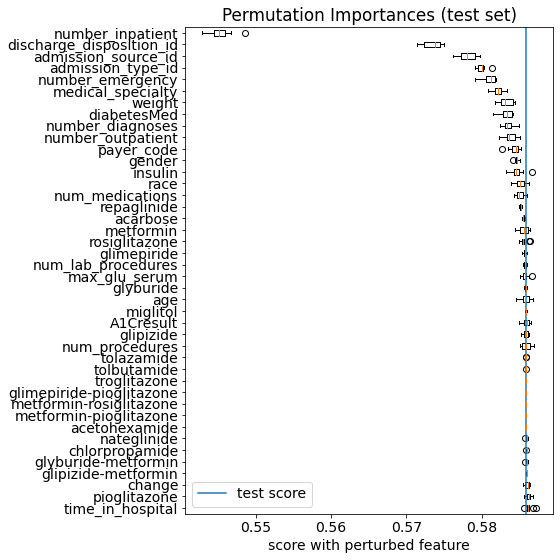

In [56]:
import matplotlib.pylab as plt

sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,8))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/perm_feature_importance_l2.png',dpi=300)
plt.show()

In [73]:
#LOGISTIC REGRESSION WITH ELASTICNET PENALTY
grid = result_log_elastic[0][1]

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == "NO")/len(y_test))

for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores[i] = acc_scores

test score =  0.5860396767083027
test baseline =  0.5407788390889052
shuffling age
   shuffled test score: 0.586 +/- 0.001
shuffling race
   shuffled test score: 0.586 +/- 0.001
shuffling gender
   shuffled test score: 0.585 +/- 0.0
shuffling weight
   shuffled test score: 0.583 +/- 0.001
shuffling admission_type_id
   shuffled test score: 0.58 +/- 0.001
shuffling discharge_disposition_id
   shuffled test score: 0.573 +/- 0.001
shuffling admission_source_id
   shuffled test score: 0.578 +/- 0.001
shuffling payer_code
   shuffled test score: 0.584 +/- 0.001
shuffling medical_specialty
   shuffled test score: 0.582 +/- 0.001
shuffling max_glu_serum
   shuffled test score: 0.586 +/- 0.0
shuffling A1Cresult
   shuffled test score: 0.586 +/- 0.0
shuffling metformin
   shuffled test score: 0.586 +/- 0.001
shuffling repaglinide
   shuffled test score: 0.586 +/- 0.0
shuffling nateglinide
   shuffled test score: 0.586 +/- 0.0
shuffling chlorpropamide
   shuffled test score: 0.586 +/- 0.0
shuffl

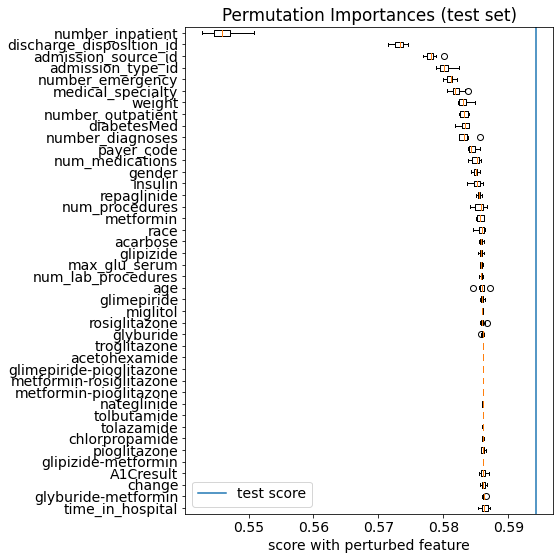

In [128]:
sorted_indcs = np.argsort(np.mean(scores,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,8))
plt.boxplot(scores[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set)")
plt.xlabel('score with perturbed feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/perm_feature_importance_elastic.png',dpi=300)
plt.show()

In [84]:
#SVC
grid = result_svc2[0][0]

test_score = grid.score(X_test,y_test)
print('test score = ',test_score)
print('test baseline = ',np.sum(y_test == "NO")/len(y_test))

scores_svc = []

for i in range(len(ftr_names)):
    print('shuffling '+str(ftr_names[i]))
    acc_scores = []
    for j in range(nr_runs):
        X_test_shuffled = X_test.copy()
        X_test_shuffled[ftr_names[i]] = np.random.permutation(X_test[ftr_names[i]].values)
        acc_scores.append(grid.score(X_test_shuffled,y_test))
    print('   shuffled test score:',np.around(np.mean(acc_scores),3),'+/-',np.around(np.std(acc_scores),3))
    scores_svc.append(acc_scores)

test score =  0.5943179035023267
test baseline =  0.5407788390889052
shuffling age
   shuffled test score: 0.592 +/- 0.0
shuffling race
   shuffled test score: 0.594 +/- 0.0
shuffling gender
   shuffled test score: 0.594 +/- 0.0
shuffling weight
   shuffled test score: 0.592 +/- 0.0
shuffling admission_type_id
   shuffled test score: 0.59 +/- 0.0
shuffling discharge_disposition_id
   shuffled test score: 0.584 +/- 0.001
shuffling admission_source_id
   shuffled test score: 0.59 +/- 0.001
shuffling payer_code
   shuffled test score: 0.591 +/- 0.0
shuffling medical_specialty
   shuffled test score: 0.592 +/- 0.0
shuffling max_glu_serum
   shuffled test score: 0.594 +/- 0.0
shuffling A1Cresult
   shuffled test score: 0.594 +/- 0.0
shuffling metformin
   shuffled test score: 0.594 +/- 0.001
shuffling repaglinide
   shuffled test score: 0.594 +/- 0.0
shuffling nateglinide
   shuffled test score: 0.594 +/- 0.0
shuffling chlorpropamide
   shuffled test score: 0.594 +/- 0.0
shuffling glimepiri

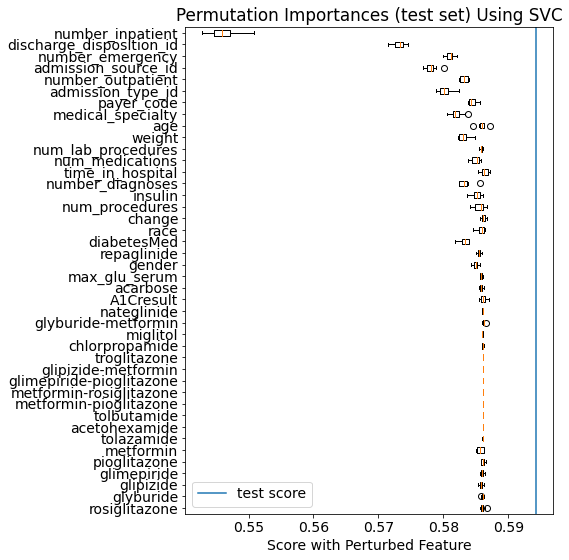

In [127]:
sorted_indcs = np.argsort(np.mean(scores_svc,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,8))
plt.boxplot(scores_svc[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set) Using SVC")
plt.xlabel('Score with Perturbed Feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/perm_feature_importance_svc.png',dpi=300)
plt.show()

In [219]:
sorted_indcs = np.argsort(np.mean(scores_svc,axis=1))[::-1]
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8,8))
plt.boxplot(scores_svc[sorted_indcs].T,labels=ftr_names[sorted_indcs],vert=False)
plt.axvline(test_score,label='test score')
plt.title("Permutation Importances (test set) Using SVC")
plt.xlabel('Score with Perturbed Feature')
plt.legend()
plt.tight_layout()
plt.savefig('../figures/perm_feature_importance_svc.png',dpi=300)
plt.show()

TypeError: only integer scalar arrays can be converted to a scalar index

<Figure size 576x576 with 0 Axes>

### Coefficient of Linear Model Feature Importance

In [121]:
def MLpipe_GSS_2(X, y, preprocessor, ML_algo):
    
    '''
    This function splits the data to other/test (80/20) using GroupShuffleSplit and then applies GroupKFold with 4 folds to other.
    The RMSE is minimized in cross-validation.'''
    
    group_on = df['patient_nbr']
        
    gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=47)

    for other_idx, test_idx in gss.split(X, y, group_on):
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]
        X_test = X.iloc[test_idx]
        y_test = y.iloc[test_idx]
        group_on_other = group_on.iloc[other_idx] 
        group_on_test = group_on.iloc[test_idx]

    gkfold = GroupKFold(n_splits=4)
    
    param_grid = {'logisticregression__C': [1]}

    final_scaler = StandardScaler(with_mean=False)

    pipeline = make_pipeline(preprocessor, final_scaler, ML_algo)

    grid = GridSearchCV(pipeline, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=gkfold, return_train_score = True, n_jobs=-1, verbose=3)

    grid.fit(X_other, y_other, groups=group_on_other)

    results = pd.DataFrame(grid.cv_results_)

    print("")
    print('Best Model Parameters:', grid.best_params_)
    print('Best Validation Score:', grid.best_score_) 
    
    feature_names = ordinal_ftrs + list(grid.best_estimator_[0].named_transformers_['onehot'].get_feature_names(onehot_ftrs)) + std_ftrs
    
        
    return grid, np.array(feature_names), X_test, y_test



In [122]:
ML_algo = LogisticRegression(random_state = 47, penalty='l2', solver='saga', max_iter=10000)

grid, feature_names, X_test, y_test = MLpipe_GSS_2(X, y, preprocessor, ML_algo)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 1/4] END logisticregression__C=1;, score=(train=0.585, test=0.586) total time= 3.2min
[CV 2/4] END logisticregression__C=1;, score=(train=0.585, test=0.581) total time= 3.4min
[CV 3/4] END logisticregression__C=1;, score=(train=0.585, test=0.582) total time= 3.4min
[CV 4/4] END logisticregression__C=1;, score=(train=0.586, test=0.580) total time= 3.4min

Best Model Parameters: {'logisticregression__C': 1}
Best Validation Score: 0.5823038097998572


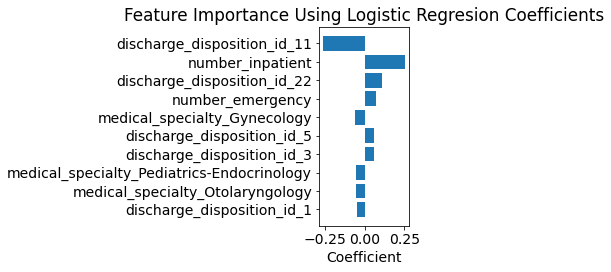

In [126]:
coefs = grid.best_estimator_[-1].coef_[0]
sorted_indcs = np.argsort(np.abs(coefs))

plt.rcParams.update({'font.size': 14})
plt.barh(np.arange(10),coefs[sorted_indcs[-10:]])
plt.yticks(np.arange(10),feature_names[sorted_indcs[-10:]])
plt.xlabel('Coefficient')
plt.title('Feature Importance Using Logistic Regresion Coefficients')
plt.tight_layout()
plt.savefig('../figures/logistic_coefs_feature_importance.png',dpi=300)
plt.show()

### SHAP Global Feature Importance

I first computed the local feature importance using SHAP, then came back to compute global feature importances here.

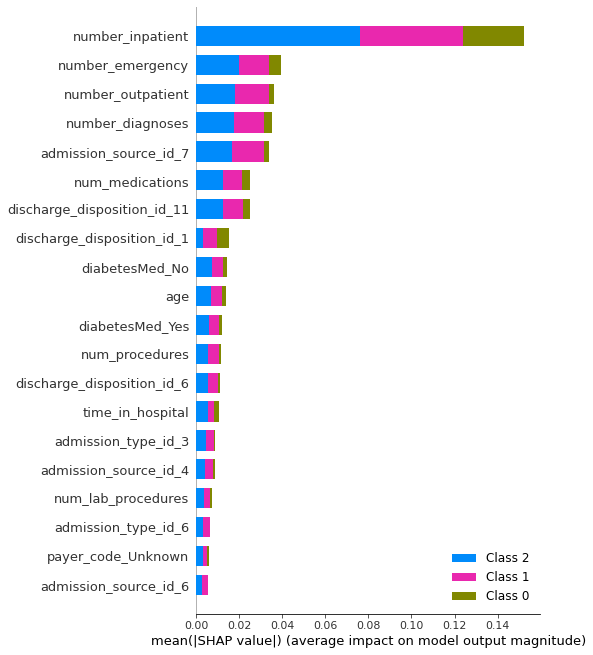

In [216]:
shap.summary_plot(shap_values, X_test_transformed,feature_names = feature_names,show=False)
plt.tight_layout()
plt.savefig('../figures/shap_global_ftr_imp.png',dpi=300)

## Local Feature Importance

In [142]:
def MLpipe_GSS_3(X, y, preprocessor):
    
    '''
    This function splits the data to other/test (80/20) using GroupShuffleSplit and then applies GroupKFold with 4 folds to other.
    The RMSE is minimized in cross-validation.'''
    
    group_on = df['patient_nbr']
        
    gss = GroupShuffleSplit(n_splits=1, train_size=0.8, random_state=47)

    for other_idx, test_idx in gss.split(X, y, group_on):
        X_other = X.iloc[other_idx]
        y_other = y.iloc[other_idx]
        X_test = X.iloc[test_idx]
        y_test = y.iloc[test_idx]
        group_on_other = group_on.iloc[other_idx] 
        group_on_test = group_on.iloc[test_idx]

    gkfold = GroupKFold(n_splits=4)
    
    param_grid = {
        'randomforestclassifier__max_depth': [12],
        'randomforestclassifier__max_features': [0.175]}

    ML_algo = RandomForestClassifier(random_state = 47)
  
    pipeline = make_pipeline(preprocessor, ML_algo)

    grid = GridSearchCV(pipeline, param_grid=param_grid, scoring = make_scorer(accuracy_score),
                        cv=gkfold, return_train_score = True, n_jobs=-1, verbose=3)

    grid.fit(X_other, y_other, groups=group_on_other)

    print("")
    print('Best Model Parameters:', grid.best_params_)
    print('Best Validation Score:', grid.best_score_) 
    
    feature_names = ordinal_ftrs + \
            list(grid.best_estimator_[0].named_transformers_['onehot'].get_feature_names(onehot_ftrs)) + \
            std_ftrs
    
        
    return grid, np.array(feature_names), X_test, y_test



In [145]:
grid, feature_names, X_test, y_test = MLpipe_GSS_3(X,y,preprocessor)

Fitting 4 folds for each of 1 candidates, totalling 4 fits
[CV 2/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.631, test=0.586) total time= 1.4min
[CV 3/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.628, test=0.584) total time= 1.4min
[CV 1/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.627, test=0.586) total time= 1.4min
[CV 4/4] END randomforestclassifier__max_depth=12, randomforestclassifier__max_features=0.175;, score=(train=0.629, test=0.587) total time= 1.4min

Best Model Parameters: {'randomforestclassifier__max_depth': 12, 'randomforestclassifier__max_features': 0.175}
Best Validation Score: 0.5857088603302424


In [185]:
import shap

shap.initjs() 
explainer = shap.TreeExplainer(grid.best_estimator_[1])
X_test_transformed = grid.best_estimator_[0].transform(X_test).todense()
print(np.shape(X_test_transformed))
shap_values = explainer.shap_values(X_test_transformed)
print(np.shape(shap_values))


(20415, 247)
(3, 20415, 247)


In [186]:
#class 0 values for first datapoint
shap_values[0][0]

array([ 2.32351831e-03, -5.17100656e-05, -1.00211748e-05,  4.91077177e-05,
       -1.78335908e-05, -2.10543209e-05,  7.64212565e-05, -1.20935127e-04,
       -5.52848339e-05,  0.00000000e+00,  0.00000000e+00,  6.16339307e-05,
       -1.82493322e-06, -1.95869614e-05, -3.54631965e-05, -1.34001669e-06,
       -1.41353458e-07, -1.83932953e-06,  3.37692303e-05, -2.53816506e-04,
        2.79293388e-04,  2.45073223e-04, -1.81034131e-04, -1.61809893e-05,
        5.28723680e-05, -1.96112768e-04,  1.12904243e-06,  1.14196509e-06,
       -4.01439594e-03, -1.29851534e-03, -3.67797190e-04, -2.11167733e-06,
       -4.33750846e-04, -6.95907868e-05, -1.11551661e-04,  1.46332011e-07,
       -1.43929750e-06,  4.60652648e-09,  1.22573882e-03, -5.37716770e-07,
        6.93990640e-05,  3.95714280e-05, -9.37869828e-06,  4.44027509e-08,
        6.48749364e-08, -1.47857066e-04,  0.00000000e+00,  0.00000000e+00,
       -1.07585696e-03,  3.94342115e-06, -1.62875474e-06,  1.35354687e-05,
        0.00000000e+00, -

In [218]:
index = 100 # the index of a sample point to explain
print(explainer.expected_value[0]) # we explain class 0 predictions
shap.force_plot(explainer.expected_value[0], shap_values[0][index,:], features = np.transpose(X_test_transformed[index,:]).tolist(),feature_names = feature_names)


0.11187373234502347
